In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [37]:
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
#connect to the hawai sqllite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [27]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

Base.metadata.create_all(engine)

#lookup tables in the model
# Base.classes.keys()

Base = automap_base()

Base.prepare(engine, reflect=True)

Base.metadata.create_all(engine)
Base.classes.keys()



['measurement', 'station']

In [28]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB

session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
present_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
present_date = str(present_date)[2:-3]
print(present_date)

year_ago = str(eval(present_date[0:4])-1) + present_date[4:]
print(year_ago)



2017-08-23
2016-08-23


In [11]:
# Perform a query to retrieve the data and precipitation scores
# Sort the dataframe by date
recent_year_prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= year_ago).filter(Measurement.date <= present_date).order_by(Measurement.date).all()


In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(data=recent_year_prcp)
prcp_df.set_index("date", inplace=True)
prcp_df.rename(columns={"prcp": "precipitation"}, inplace=True)
# prcp_df.head() 

prcp_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


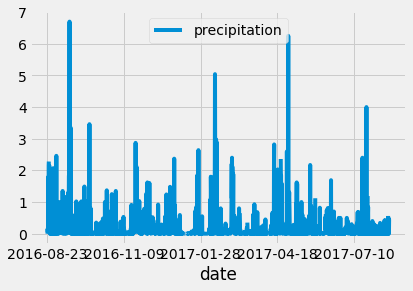

In [13]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot()
plt.legend(loc=9)
plt.savefig("prcp_analysis.png")
plt.show()

In [14]:
# Design a query to show how many stations are available in this dataset?

# How many stations are available in this dataset?
stations = session.query(func.count(Station.station))
station_quantity = stations[0]
station_quantity


(9)

In [15]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

observations = session.query(Measurement.station, func.count(Measurement.tobs))\
             .group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc())

for station in observations:
    print(station)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [31]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
highest_station = observations[0][0]

stats = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == highest_station)
                      
list_of_stats=list(stats)
print(list_of_stats)

[(54.0, 85.0, 71.66378066378067)]


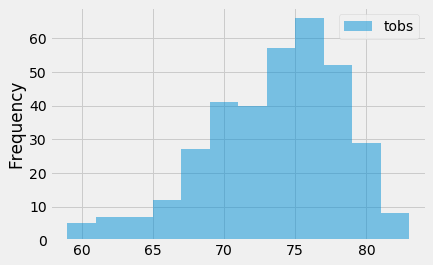

In [36]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

USC_plottedquery = engine.execute('SELECT date , tobs FROM measurement WHERE station = "USC00519281" AND date > "2016-08-23"').fetchall()
USC_plottedquery

USC_df = pd.DataFrame(USC_plottedquery)
USC_df = usc281_df.rename(columns={0: 'date', 1: 'tobs'})
USC_df.head()

USC_df.plot.hist(bins = 12, alpha=.5)


## Bonus Challenge Assignment

In [23]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [24]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

last_year_start = str(eval(start_date[0:4])-1) + start_date[4:]
last_year_end = str(eval(end_date[0:4])-1) + end_date[4:]

last_year_analysis = calc_temps(last_year_start, last_year_end)

tmin = last_year_analysis[0][0]
tmax = last_year_analysis[0][1]
tavg = last_year_analysis[0][2]

print(last_year_analysis)



[(61.0, 69.75510204081633, 75.0)]


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
